<a href="https://colab.research.google.com/github/avinashrajavarapu/HR-Churn-Analysis/blob/master/HR_Churn_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import tensorflow as tf

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
train_data = pd.read_csv('/content/gdrive/My Drive/train_data.csv')
pd.set_option('display.max_columns',None)
train_data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [ ]:
# Preprocessing the data
# Encoding categorical variables
train_data.info()
train_data = pd.get_dummies(train_data, columns=['sales', 'salary'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [ ]:
train_data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,0.081805,0.052470,0.051137,0.049270,0.042003,0.057204,0.060137,0.276018,0.148610,0.181345,0.082472,0.487766,0.429762
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,0.274077,0.222981,0.220284,0.216438,0.200602,0.232239,0.237749,0.447041,0.355715,0.385317,0.275092,0.499867,0.495059
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
train_data.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales_IT                 0
sales_RandD              0
sales_accounting         0
sales_hr                 0
sales_management         0
sales_marketing          0
sales_product_mng        0
sales_sales              0
sales_support            0
sales_technical          0
salary_high              0
salary_low               0
salary_medium            0
dtype: int64

In [ ]:
train_data['satisfaction_level'] = train_data['satisfaction_level'].fillna(train_data['satisfaction_level'].mean())

In [ ]:
train_data['satisfaction_level'] = train_data['satisfaction_level'].map(lambda x: 1 if x > 0.5 else 0)

In [ ]:
train_data[:5]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium
0,0,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,1,0.86,5,262,6,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0,0.88,7,272,4,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,1,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [ ]:
#numerical variables

num = list(train_data.select_dtypes(include=['int64','float64']).keys())

#categorical variables

cat = list(train_data.select_dtypes(include='O').keys())

print(cat)

print(num)

[]
['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years']


In [ ]:
train_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium
0,0,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,1,0.86,5,262,6,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0,0.88,7,272,4,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,1,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [ ]:
cols_to_scale = ['number_project','average_montly_hours','time_spend_company']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_data[cols_to_scale] = scaler.fit_transform(train_data[cols_to_scale])

In [ ]:
for col in train_data:
    print(f'{col}: {train_data[col].unique()}')

satisfaction_level: [0 1]
last_evaluation: [0.53 0.86 0.88 0.87 0.52 0.5  0.77 0.85 1.   0.54 0.81 0.92 0.55 0.56
 0.47 0.99 0.51 0.89 0.83 0.95 0.57 0.49 0.46 0.62 0.94 0.48 0.8  0.74
 0.7  0.78 0.91 0.93 0.98 0.97 0.79 0.59 0.84 0.45 0.96 0.68 0.82 0.9
 0.71 0.6  0.65 0.58 0.72 0.67 0.75 0.73 0.63 0.61 0.76 0.66 0.69 0.37
 0.64 0.39 0.41 0.43 0.44 0.36 0.38 0.4  0.42]
number_project: [0.  0.6 1.  0.8 0.4 0.2]
average_montly_hours: [0.28504673 0.77570093 0.82242991 0.59345794 0.29439252 0.26635514
 0.70560748 0.76168224 0.59813084 0.21495327 0.18224299 0.97663551
 0.64485981 0.24299065 0.19158879 0.21962617 0.29906542 0.74299065
 0.86915888 0.23831776 0.97196262 0.20093458 0.28971963 0.68224299
 0.6682243  0.14953271 0.1682243  0.92523364 0.17757009 0.22897196
 0.20560748 0.70093458 0.14018692 0.98130841 0.26168224 0.80841121
 0.14485981 0.86448598 0.8411215  0.40186916 0.8271028  0.98598131
 0.9953271  0.60280374 0.60747664 0.99065421 0.69158879 0.88785047
 0.30373832 0.78504673 0.84

In [ ]:

X = train_data.drop('satisfaction_level',axis='columns')
y = train_data['satisfaction_level']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)

(11999, 20)
(3000, 20)
(11999,)


In [ ]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(26, input_shape=(20,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
375/375 [==============================] - 7s 4ms/step - loss: 0.5304 - accuracy: 0.7606
Epoch 2/100
375/375 [==============================] - 1s 3ms/step - loss: 0.4620 - accuracy: 0.8032
Epoch 3/100
375/375 [==============================] - 1s 3ms/step - loss: 0.4350 - accuracy: 0.8255
Epoch 4/100
375/375 [==============================] - 1s 3ms/step - loss: 0.4122 - accuracy: 0.8358
Epoch 5/100
375/375 [==============================] - 1s 3ms/step - loss: 0.3933 - accuracy: 0.8417
Epoch 6/100
375/375 [==============================] - 1s 3ms/step - loss: 0.3814 - accuracy: 0.8431
Epoch 7/100
375/375 [==============================] - 1s 3ms/step - loss: 0.3738 - accuracy: 0.8460
Epoch 8/100
375/375 [==============================] - 1s 3ms/step - loss: 0.3683 - accuracy: 0.8465
Epoch 9/100
375/375 [==============================] - 1s 4ms/step - loss: 0.3650 - accuracy: 0.8467
Epoch 10/100
375/375 [==============================] - 2s 5ms/step - loss: 0.3630 - accura

In [ ]:
model.evaluate(X_test, y_test)

94/94 [==============================] - 0s 2ms/step - loss: 0.3634 - accuracy: 0.8460


[0.3634205460548401, 0.8460000157356262]

In [ ]:
# predict the churn values
ypred = model.predict(X_test)
print(ypred)
# unscaling the ypred values
ypred_lis = []
for i in ypred:
    if i>0.5:
        ypred_lis.append(1)
    else:
        ypred_lis.append(0)
print(ypred_lis)

94/94 [==============================] - 0s 2ms/step
[[3.4923980e-04]
 [9.7487158e-01]
 [3.1161857e-05]
 ...
 [7.7921665e-01]
 [8.9890222e-05]
 [7.7449065e-01]]
[0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1

In [ ]:
y_test[:10]

184      0
1126     1
942      0
11865    1
5265     1
13763    1
5871     1
3557     1
9687     1
4706     1
Name: satisfaction_level, dtype: int64

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,ypred_lis))

              precision    recall  f1-score   support

           0       0.85      0.65      0.73       984
           1       0.85      0.94      0.89      2016

    accuracy                           0.85      3000
   macro avg       0.85      0.80      0.81      3000
weighted avg       0.85      0.85      0.84      3000



Text(95.72222222222221, 0.5, 'Truth')

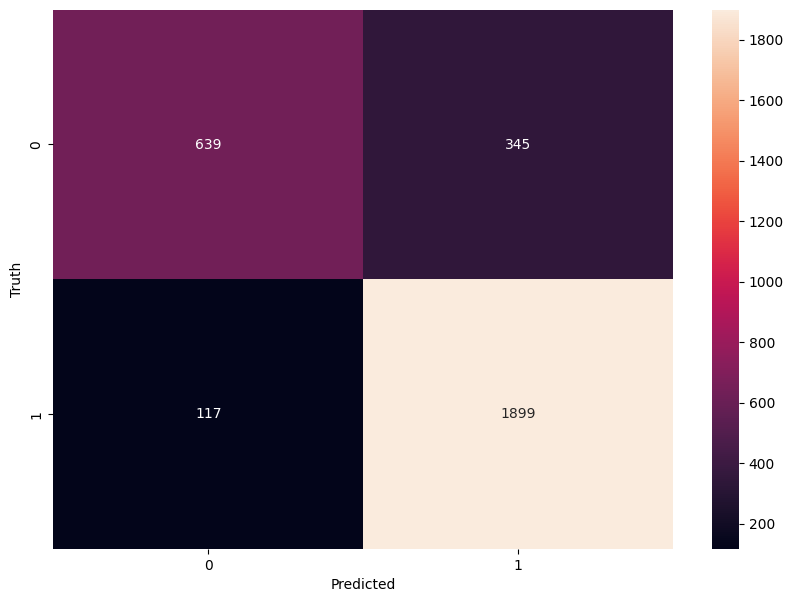

In [ ]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=ypred_lis)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')